# Project 1: Classification Analysis on Textual Data

### Classification Analysis on Textual Data 
#### Spring 2021

In [18]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lifelines
import warnings
warnings.filterwarnings('ignore')

### Part 1: TF-IDF

Load "20 Newsgroups" dataset. It is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. It is is splitted in two subsets: one for training (or development) and the other one for testing (or for performance evaluation) and is a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

In [60]:
from sklearn.datasets import fetch_20newsgroups
# Refer to the offcial document of scikit-learn for detailed usages:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
categories = ['comp.graphics', 'comp.sys.mac.hardware']
# The 
twenty_train = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  categories=None, # choose the categories to load; if is `None`, load all categories
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [61]:
print(type(twenty_train.data))

<class 'list'>


In [64]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [63]:
np.unique(twenty_train.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [67]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [76]:
df = pd.DataFrame(data= np.c_[twenty_train['data'], twenty_train['target'], list(map(lambda x: twenty_train['target_names'][x], twenty_train['target']))],
                     columns= ['data', 'target', 'target_names'])
df.head(10)

,data,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,16,talk.politics.guns
6,From: bmdelane@quads.uchicago.edu (brian manni...,13,sci.med
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,3,comp.sys.ibm.pc.hardware
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,2,comp.os.ms-windows.misc
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,4,comp.sys.mac.hardware


In [ ]:
plt.figure(figsize=(120, 30))
ax = sns.histplot(data = df['target_names'])
ax.set(xlabel='Categories', ylabel='Number of Training Documents')
ax.axes.set_title('Histogram of Training Document Categories',fontsize=50)
plt.show()

In [68]:
data = pd.Series(twenty_train.data) 
data = pd.DataFrame(data) 
data.columns = ['Data'] + data.columns.tolist()[1:] 
data['target'] = pd.Series(twenty_train.target)
data.head(10)

,Data,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,16
6,From: bmdelane@quads.uchicago.edu (brian manni...,13
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,3
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,2
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,4


In [69]:
len(twenty_train.data)

11314

In [70]:
len(twenty_test.data)

774

In [92]:
data['target'] = data['target'].astype('int')

In [ ]:
# plot histogram of # of trainings documents for each of the 20 categorues to check if they're evenly distributed
plt.figure(figsize=(12, 8))
order=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
ax = sns.histplot(data = data['target'])
ax.set(xlabel='Categories', ylabel='Number of Training Documents')
ax.axes.set_title('Histogram of Training Document Categories',fontsize=16)
plt.show()
#ax.figure.savefig("categoryhist.png")

Text(0.5, 0, 'Categories')

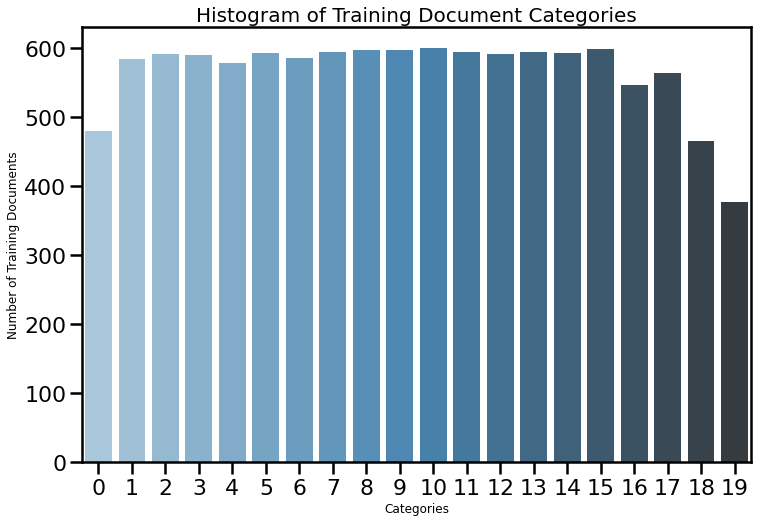

In [127]:
count_Categories = data['target'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=count_Categories.index, y=count_Categories.values,palette=("Blues_d"))
plt.title('Histogram of Training Document Categories', fontsize=20)
plt.ylabel('Number of Training Documents', fontsize=12)
plt.xlabel('Categories', fontsize=12)
#sns.set_context("poster")

#### The training documents are roughly evenly distributed as seen from the histogram above

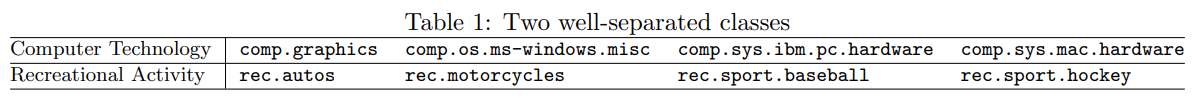

In [76]:
# setting sead
import numpy as np
np.random.seed(42)
import random
random.seed(42)


from sklearn.datasets import fetch_20newsgroups
# Refer to the offcial document of scikit-learn for detailed usages:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

train_dataset = fetch_20newsgroups(
                                 subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                 categories=categories, # choose the categories to load; if is `None`, load all categories
                                 shuffle=True,
                                 random_state=None, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
                                 )
test_dataset = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=None)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS

In [78]:
len(stop_words)

318

In [ ]:
'''
QUESTION 2: Use the following specs to extract features from the textual data:
• Use the “english” stopwords of the CountVectorizer
• Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)
• Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos tag
• Use min df=3
Report the shape of the TF-IDF matrices of the train and test subsets respectively.
'''

In [79]:
count_Vectorizer = CountVectorizer(min_df=3, stop_words="english")
doc_train_matrix = count_Vectorizer.fit_transform(train_dataset.data)
doc_train_matrix.shape

(4732, 20297)

In [80]:
# Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos tag
import nltk
from nltk import pos_tag
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()


def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in stop_words and not word.isdigit())

analyzer = CountVectorizer().build_analyzer()

In [81]:
vectorizer = CountVectorizer(min_df=3,analyzer=stem_rmv_punc, stop_words='english')

In [8]:
X = vectorizer.fit_transform(train_dataset.data)
Y = vectorizer.transform(test_dataset.data)
print(X.shape)
print(Y.shape)

(4732, 16319)
(3150, 16319)


In [82]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

traindata_tfidf = tfidf_transformer.fit_transform(X)
testdata_tfidf = tfidf_transformer.transform(Y)
print('Shape of the TF-IDF train matrix is', X.shape)
print('Shape of the TF-IDF test matrix is', Y.shape)

Shape of the TF-IDF train matrix is (4732, 16319)
Shape of the TF-IDF test matrix is (3150, 16319)


In [83]:
#use toarray to convert sparse matrixes to ordinary matrices
train_ordinary_matrix = X.toarray()
test_ordinary_matrix = Y.toarray()
print(train_ordinary_matrix.shape)
print(test_ordinary_matrix.shape)

(4732, 16319)
(3150, 16319)


### Question 3: Dimensionality Reduction

In [27]:
'''
Question #3

Reduce the dimensionality of the data using the LSI/NMF

Apply LSI to the TF-IDF matrix corresponding to the 8 categories with k = 50; so each
document is mapped to a 50-dimensional vector.

Also reduce dimensionality through NMF (k = 50) and compare with LSI:

Which Frobenius norm is larger, the NMF magnitude or the LSI magnitude. Why is this the case?
'''

'\nQuestion #3\n\nReduce the dimensionality of the data using the LSI/NMF\n\nApply LSI to the TF-IDF matrix corresponding to the 8 categories with k = 50; so each\ndocument is mapped to a 50-dimensional vector.\n\nAlso reduce dimensionality through NMF (k = 50) and compare with LSI:\n\nWhich Frobenius norm is larger, the NMF magnitude or the LSI magnitude. Why is this the case?\n'

In [85]:
# LSI: Latent Semantic Indexing (LSI) 
from sklearn.decomposition import TruncatedSVD, NMF

lsi = TruncatedSVD(n_components=50)
lsi_X_reduced = lsi.fit_transform(traindata_tfidf) # train_data matrix
#lsi_Y_reduced = lsi.transform(Y) # # test_data matrix
print(lsi_X_reduced.shape) 
#print(lsi_Y_reduced.shape) 

(4732, 50)


In [23]:
X_train_lsi=lsi.inverse_transform(lsi_X_reduced)

In [24]:
# Get Frobenius Norm of Square Difference for LSI

np.sum(np.array(traindata_tfidf - X_train_lsi)**2)

4106.993564437687

In [25]:
# NMF: Non-negative Matrix Factorization (NMF)
nmf = NMF(n_components=50)
nmf_X_reduced = nmf.fit_transform(traindata_tfidf)
#nmf_Y = nmf.transform(Y)
print(nmf_X_reduced.shape)
#print(Y.shape)

(4732, 50)


In [28]:
# Get Frobenius Norm of Square Difference for NMF
W = nmf_X_reduced
H = nmf.components_
np.sum(np.array(traindata_tfidf - W.dot(H))**2)

4143.667894037169

**The error for NMF is larger due to additional constraints where W and H need to be non-negative. On the other hand, LSI has less constraints during the dimensionality reduction process.** 

### Question 4: SVM Classifier

In [30]:
'''
Question #4: classify the documents into two classes “Computer Technology” vs “Recreational Activity”

Train two linear SVMs and compare
Use cross-validation to choose γ (use average validation accuracy to compare)

'''

'\nQuestion #4: classify the documents into two classes “Computer Technology” vs “Recreational Activity”\n\nTrain two linear SVMs and compare\nUse cross-validation to choose γ (use average validation accuracy to compare)\n\n'

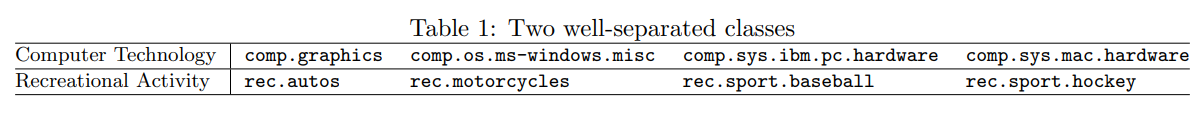

In [86]:
print(np.unique(train_dataset.target))
print(np.unique(train_dataset.target_names))

[0 1 2 3 4 5 6 7]
['comp.graphics' 'comp.os.ms-windows.misc' 'comp.sys.ibm.pc.hardware'
 'comp.sys.mac.hardware' 'rec.autos' 'rec.motorcycles'
 'rec.sport.baseball' 'rec.sport.hockey']


In [87]:
binary_train_target = train_dataset.target
binary_test_target = test_dataset.target
for i in [0,1,2,3]:
    binary_train_target[np.argwhere(train_dataset.target == i)] = 0 #computer technology
    binary_test_target[np.argwhere(test_dataset.target == i)] = 0
for i in [4,5,6,7]:
    binary_train_target[np.argwhere(train_dataset.target == i)] = 1 #recreational activity
    binary_test_target[np.argwhere(test_dataset.target == i)] = 1

[0 1]


In [88]:
print(np.unique(binary_train_target))
print(np.unique(binary_test_target))

[0 1]


In [100]:
# train one with hard margin and one with soft marginbinary_train_target
from sklearn.svm import LinearSVC

clf_hard = LinearSVC(C = 1000).fit(lsi_X_reduced, binary_train_target)
clf_soft = LinearSVC(C = 0.0001).fit(lsi_X_reduced, binary_train_target)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.base import BaseEstimator, TransformerMixin
class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self

from sklearn.decomposition import NMF

# nmf = NMF(n_components=50, init='random', random_state=0)

# "The purpose of the pipeline is to assemble several steps that can 
#  be cross-validated together while setting different parameters."
from sklearn.pipeline import Pipeline
pipeline_hard = Pipeline([
    ('vect', CountVectorizer(stop_words='english', min_df=3, analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50)),
    ('toarr', SparseToDenseArray()),
    ('clf', SVC(kernel='linear', C=1000)),
])
pipeline_soft = Pipeline([
    ('vect', CountVectorizer(stop_words='english', min_df=3, analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50)),
    ('toarr', SparseToDenseArray()),
    ('clf', SVC(kernel='linear', C=0.0001)),
])

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline


In [102]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
#     return pipe

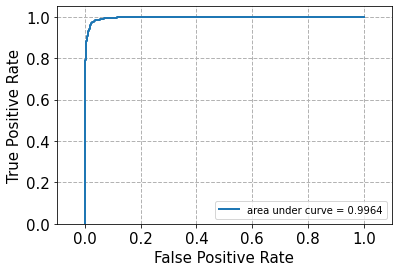

In [104]:
fit_predict_and_plot_roc(pipeline_hard, train_dataset.data, binary_train_target, test_dataset.data, binary_test_target)

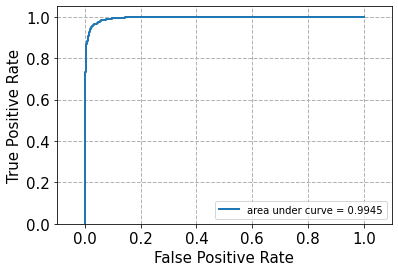

In [105]:
fit_predict_and_plot_roc(pipeline_soft, train_dataset.data, binary_train_target, test_dataset.data, binary_test_target)

In [109]:
pred_hard = pipeline_hard.predict(test_dataset.data)
print('accuracy is:', accuracy_score(binary_test_target, pred_hard))
print('recall is:', recall_score(binary_test_target, pred_hard))
print('precision is:', precision_score(binary_test_target, pred_hard))
print('f1_score is:', f1_score(binary_test_target, pred_hard))

accuracy is: 0.9717460317460317
recall is: 0.9786163522012579
precision is: 0.9658597144630664
f1_score is: 0.9721961886910341
confusion matrix is: [[1505   55]
 [  34 1556]]


Confusion matrix, without normalization
[[1505   55]
 [  34 1556]]


<Figure size 432x288 with 0 Axes>

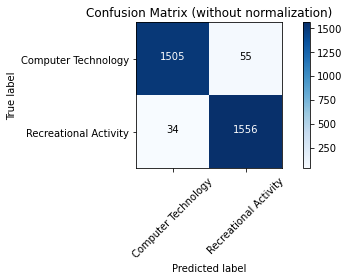

<Figure size 432x288 with 0 Axes>

In [113]:
class_names = ['Computer Technology', 'Recreational Activity']
cnf_matrix = confusion_matrix(binary_test_target, pred_hard)
np.set_printoptions(precision=2)
    
#plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title = 'Confusion Matrix (without normalization)')
plt.figure()

In [115]:
pred_soft = pipeline_soft.predict(test_dataset.data)
print('accuracy is:', accuracy_score(binary_test_target, pred_soft))
print('recall is:', recall_score(binary_test_target, pred_soft))
print('precision is:', precision_score(binary_test_target, pred_soft))
print('f1_score is:', f1_score(binary_test_target, pred_soft))

accuracy is: 0.5047619047619047
recall is: 1.0
precision is: 0.5047619047619047
f1_score is: 0.6708860759493671


Confusion matrix, without normalization
[[   0 1560]
 [   0 1590]]


<Figure size 432x288 with 0 Axes>

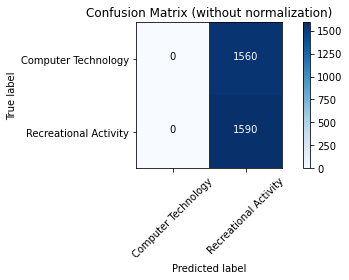

<Figure size 432x288 with 0 Axes>

In [114]:
class_names = ['Computer Technology', 'Recreational Activity']
cnf_matrix = confusion_matrix(binary_test_target, pred_soft)
np.set_printoptions(precision=2)
    
#plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title = 'Confusion Matrix (without normalization)')
plt.figure()

#### questions: What happens for the soft margin SVM? Why is the case? Does the ROC curve of the soft margin SVM look good? Does this conflict with other metrics?

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
cvv = svm.SVC(probability = True)
svm_cvv_grid = GridSearchCV(cvv, parameters, cv=5)
svm_cvv_grid.fit(nmf_X_reduced, binary_train_target)

In [129]:
pd.DataFrame(svm_cvv_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.504530,0.138613,0.555894,0.068820,0.001,{'C': 0.001},0.504752,0.504752,0.505285,0.505285,0.504228,0.504861,0.000396,7
1,7.500808,0.520478,0.626912,0.144796,0.01,{'C': 0.01},0.836325,0.825766,0.782241,0.793869,0.858351,0.819310,0.027845,6
2,3.940322,0.279518,0.291414,0.024678,0.1,{'C': 0.1},0.947202,0.930306,0.933404,0.929175,0.940803,0.936178,0.006843,5
3,2.084601,0.146638,0.154808,0.037712,1,{'C': 1},0.961985,0.954593,0.955603,0.948203,0.965116,0.957100,0.005930,3
4,1.473200,0.124099,0.103800,0.015222,10,{'C': 10},0.971489,0.958817,0.961945,0.963002,0.972516,0.965554,0.005452,1
5,1.406701,0.098963,0.075205,0.006679,100,{'C': 100},0.958817,0.957761,0.952431,0.966173,0.965116,0.960060,0.005059,2
6,1.761300,0.125696,0.079614,0.007621,1000,{'C': 1000},0.956705,0.946146,0.937632,0.952431,0.949260,0.948435,0.006434,4


### Based on 5-Fold cross validation, C=10 appears to be the best choice for NMF training set.

In [ ]:
# Cross Validation: Use a 5-fold cross-validation, find the best value of the parameter

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.svm import SVC

SVC(kernel='hinge',C=1)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
# f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scores = cross_val_score(clf, W_train, twenty_train.target, cv=cv, scoring='f1_macro')

scores

## Part 2: Word Embedding

In [9]:
import nltk
import numpy as np
import pandas as pd
#from scipy import spatial
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.manifold import TSNE
#from sklearn.preprocessing import StandardScaler
#from nltk.corpus import stopwords
#import re
#import string

In [7]:
#Create a key-value dictionary where key is the word and value is the word embedding
embeddings_dict = {}
dimension_of_glove = 300
with open("glove.6B.300d.txt", 'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

##### QUESTION 8: Read the paper about GLoVE embeddings - found here and answer the following subquestions: answered in report


In [ ]:
print(embeddings_dict['queen']-embeddings_dict['king']-embeddings_dict['wife']+embeddings_dict['husband'])

In [ ]:
print(embeddings_dict['queen']-embeddings_dict['king'])

In [ ]:
print(embeddings_dict['wife']-embeddings_dict['husband'])

In [8]:
print(embeddings_dict['computer'])

[-2.7628e-01  1.3999e-01  9.8519e-02 -6.4019e-01  3.1988e-02  1.0066e-01
 -1.8673e-01 -3.7129e-01  5.9740e-01 -2.0405e+00  2.2368e-01 -2.6314e-02
  7.2408e-01 -4.3829e-01  4.8886e-01 -3.5486e-03 -1.0006e-01 -3.0587e-01
 -1.5621e-01 -6.8136e-02  2.1104e-01  2.9287e-01 -8.8861e-02 -2.0462e-01
 -5.7602e-01  3.4526e-01  4.1390e-01  1.7917e-01  2.5143e-01 -2.2678e-01
 -1.0103e-01  1.4576e-01  2.0127e-01  3.1810e-01 -7.8907e-01 -2.2194e-01
 -2.4833e-01 -1.5103e-02 -2.0050e-01 -2.6441e-02  1.8551e-01  3.3782e-01
 -3.3543e-01  8.6117e-01 -4.7083e-02 -1.7009e-01  3.0438e-01  9.4119e-02
  3.2435e-01 -8.1171e-01  8.8966e-01 -3.9149e-01  1.6828e-01  1.4316e-01
  3.6339e-03 -6.4557e-02  4.5777e-02 -3.2248e-01  4.8943e-02  1.6817e-01
  6.8344e-02  5.4227e-01  1.2493e-01  6.9742e-01 -3.7194e-02  3.3080e-01
 -4.2194e-01  3.3970e-01  2.7646e-01 -1.6003e-02 -2.1827e-01  4.4535e-01
  3.5379e-01 -2.2089e-02  2.1375e-01  4.3267e-01 -3.2897e-01  9.6165e-02
  3.1265e-01 -3.0528e-01  2.6126e-01 -6.5364e-01 -7

## Feature Engineering: Stemming & Lemmatization

##### QUESTION 9: For the binary classification task distinguishing the “Computer Technology” class and “Recreational Activity” class:
1. Describe a feature engineering process that uses GLoVE word embeddings to represent each document. 
2. Select a classifier model, train and evaluate it with your GLoVE-based feature.





##### QUESTION 10: Plot the relationship between the dimension of the pre-trained GLoVE embedding and the resulting accuracy of the model in the classification task. Describe the observed trend. Is this trend expected? Why or why not?

##### QUESTION 11: Compare and contrast the two visualizations. Are there clusters formed in either or both of the plots?

### Multiclass Classification

##### QUESTION 12: In this part, we aim to learn classifiers on the documents belonging to the classes: comp.sys.ibm.pc.hardware, comp.sys.mac.hardware, misc.forsale, soc.religion.christian

Perform Naïve Bayes classification and multiclass SVM classification (with both One VS One and
One VS the rest methods described above) and report the confusion matrix and calculate the
accuracy, recall, precision and F-1 score of your classifiers.
